# Time Series EDA

In [1]:
# 1. Data Ingesition
# 2. EDA of the data
# 3. Preprcocessing of data
# 4. Model Buliding
# 5. Model Evalution

1. Data Ingesition:
    
Import the Required Libraries: Such as Numpy, Pandas, Matplotlib, Seaborn etc.

Load the Data.

Load Time Series Data into a pandas dataframe.

Set the datatime column as the index of the dataframe.

Check the datatype of the index and convert it to datatime if necessary.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
data=pd.read_csv("C:\\Users\\rajee\\Desktop\\DS\\DATA_02\\TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [8]:
# Univarite timeseries
stock_data=data[["Date","Close"]]
stock_data

,Date,Close
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2951,2022-03-18,905.390015
2952,2022-03-21,921.159973
2953,2022-03-22,993.979980
2954,2022-03-23,999.109985


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2956 non-null   object 
 1   Close   2956 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.3+ KB


In [10]:
stock_data["Date"]=pd.to_datetime(stock_data["Date"])

In [11]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2956 non-null   datetime64[ns]
 1   Close   2956 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.3 KB


In [12]:
stock_data.head(2)

,Date,Close
0,2010-06-29,4.778
1,2010-06-30,4.766


In [13]:
stock_data=stock_data.set_index("Date")
stock_data

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980


In [15]:
# ## Why we r converting date column as a index column
# 1. We can easily retrive the data
# 2. Visualization is also simple.
# 3. Those Library has been design in such a way it required date column as a index(scipy statsmodel)

In [16]:
stock_data.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


## EDA (Exploratory Data Analysis)

1. Summary Statistics

* Compute summary statistics such as mean, median,mode,standrad deviation to get an overview of the data.

2. Visualization the Time Series Data

* Plot the Time Series Data
* Plot the rolling means and rolling standrad deviation of the Time Seriess data.
* Decompose the Time Series Data Check for any trends,seasonality, and Noise.
* Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check

* Check for stationary.
* Check for stationary of the Time Series data using Augmented Dickey-Fuller test.

4. Check for Autocorrection

* Plot the autocorrelation function (ACF) and partial autocorrelation function(PACF) to indetify the order of the ARIMA model.

5. Outlier Detection

* Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation

* Plot the autocorrelation function (ACF) and partial autocorrelation function(PACF) to indetify the order of the ARIMA model.

In [17]:
stock_data.describe()

,Close
count,2956.000000
mean,138.762183
std,250.123115
min,3.160000
25%,19.615000
50%,46.545000
75%,68.103998
max,1229.910034


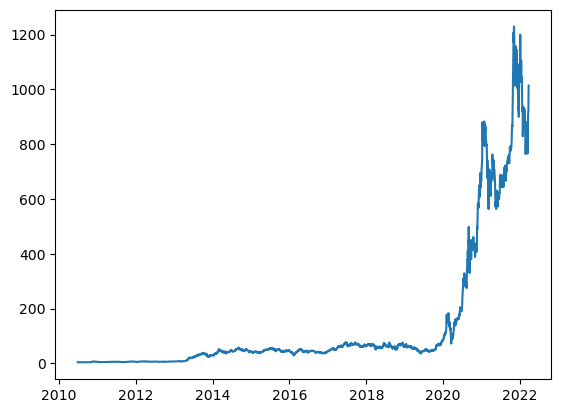

In [18]:
plt.plot(stock_data.Close)

(array([2435.,   86.,   33.,   64.,   36.,  130.,   74.,   41.,   42.,
          15.]),
 array([   3.16     ,  125.8350034,  248.5100068,  371.1850102,
         493.8600136,  616.535017 ,  739.2100204,  861.8850238,
         984.5600272, 1107.2350306, 1229.910034 ]),
 <BarContainer object of 10 artists>)

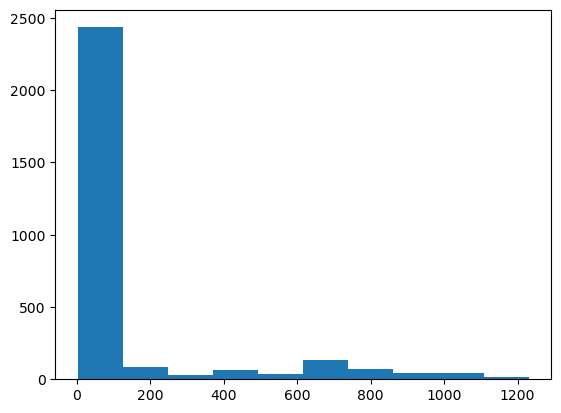

In [19]:
plt.hist(stock_data.Close)

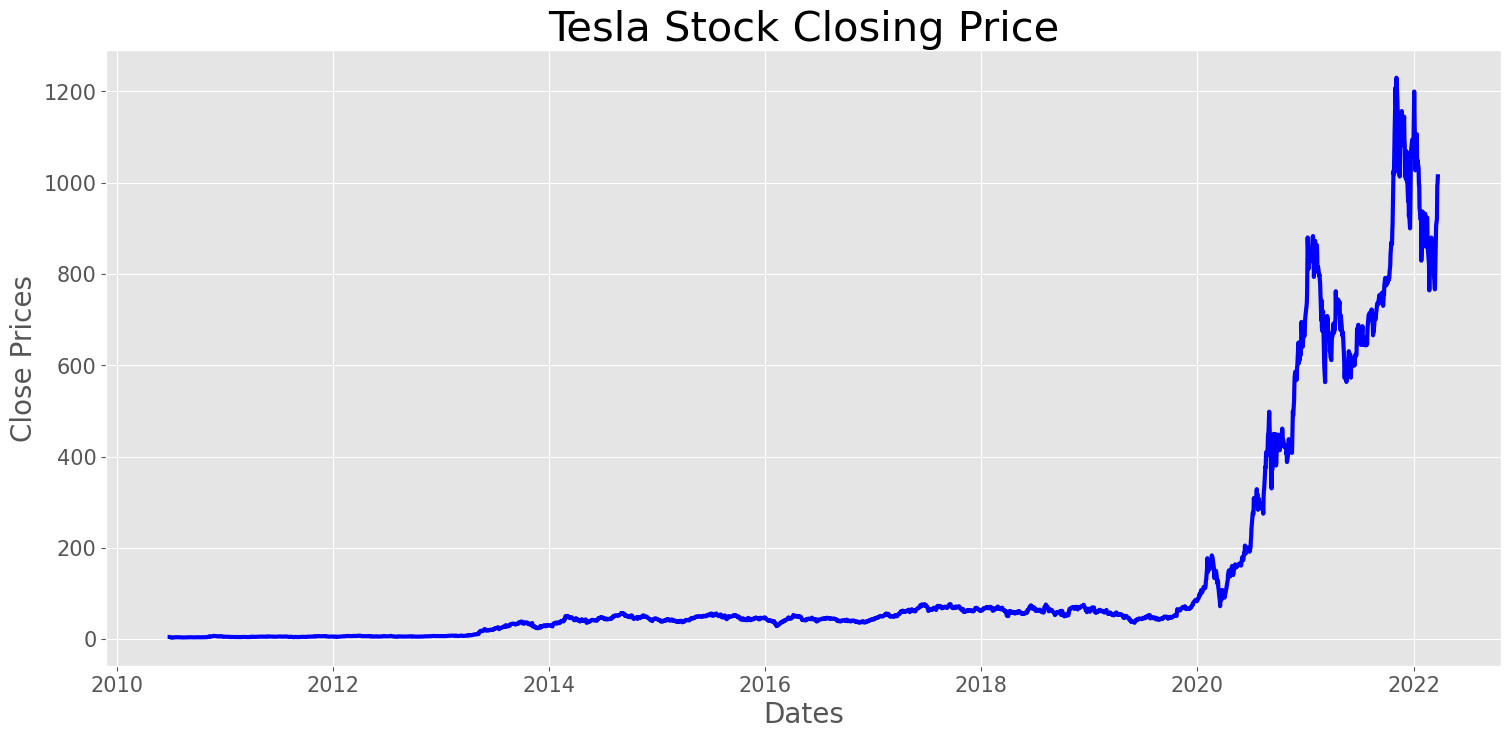

In [20]:
## Plotting close Price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize = 20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()
# ggplot() is used to construct the initial plot object, and is almost always followed by a plus sign ( + ) to add components to the plot.
#  ["gg" stands for Grammar of Graphics].

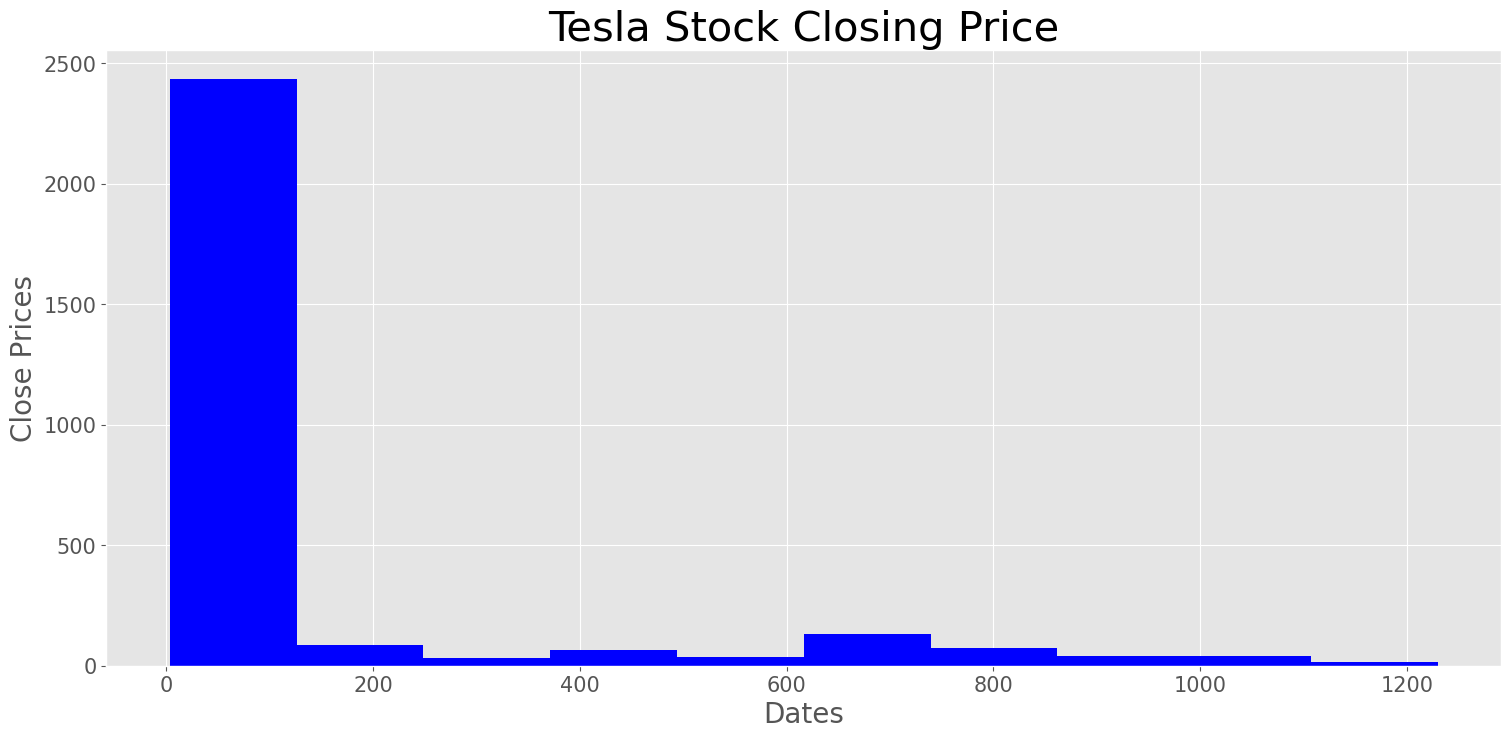

In [22]:
## Plotting histogram of close Price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize = 20)
plt.yticks(fontsize=15)
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

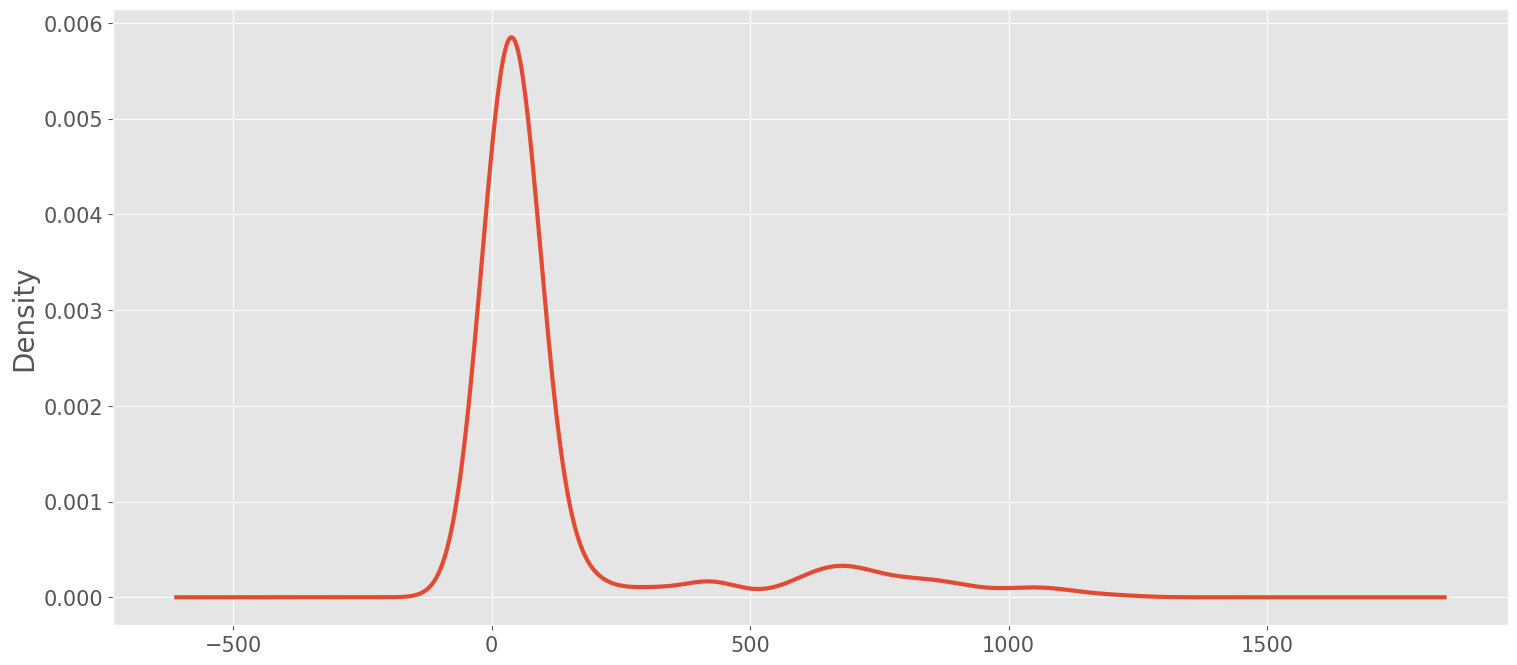

In [23]:
## Distribution of the close Price
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize =(18,8), linewidth = 3)
plt.xticks(fontsize=15)
plt.grid("both")
plt.ylabel('Density',fontsize = 20)
plt.yticks(fontsize=15)
plt.show()

In [28]:
rolmean=stock_data["Close"].rolling(48).mean()
# rolmean is helpful to determine the moving average
rolstd=stock_data["Close"].rolling(48).std()

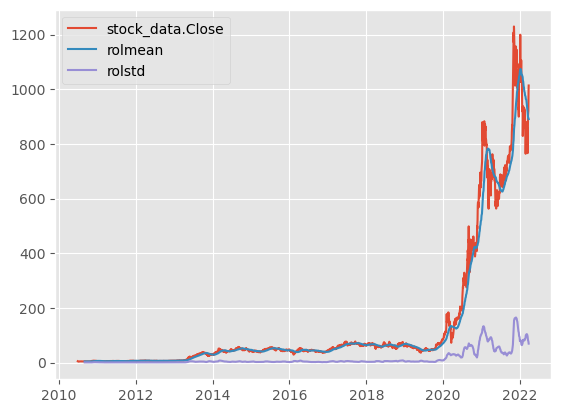

In [29]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)
plt.legend(["stock_data.Close", "rolmean", "rolstd"])

Here mean is increasing exponential, so it's not a stationary TS

In [30]:
## ADF (Ada Fuller test)
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])
adft

(1.4239415939225941,
 0.9972202364261444,
 28,
 2927,
 {'1%': -3.4325860929804404,
  '5%': -2.8625279573644873,
  '10%': -2.5672959172141048},
 22241.284192789386)

Here P value is greater than 0.05, so we hv to accept our null hypothesis.

In [31]:
#pd.Series(adft[0:4])
pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"])

test stats        1.423942
p-value           0.997220
lag              28.000000
data points    2927.000000
dtype: float64

In [40]:
# Test for Stationary
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() #rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize=(18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original',linewidth = 3)
    plt.plot(rolmean, color='red',label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black',label='Rolling Std',linewidth = 4)
    plt.legend(loc='best',fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft=adfuller(timeseries,autolag='AIC')
    # Output for dft will give us without defining what are the values?
    # Hence we manually write what values does it explains using a for loop.
    output = pd.Series(adft[0:4],index=['Test Statistics', 'p-value','No. of lags used','Num'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

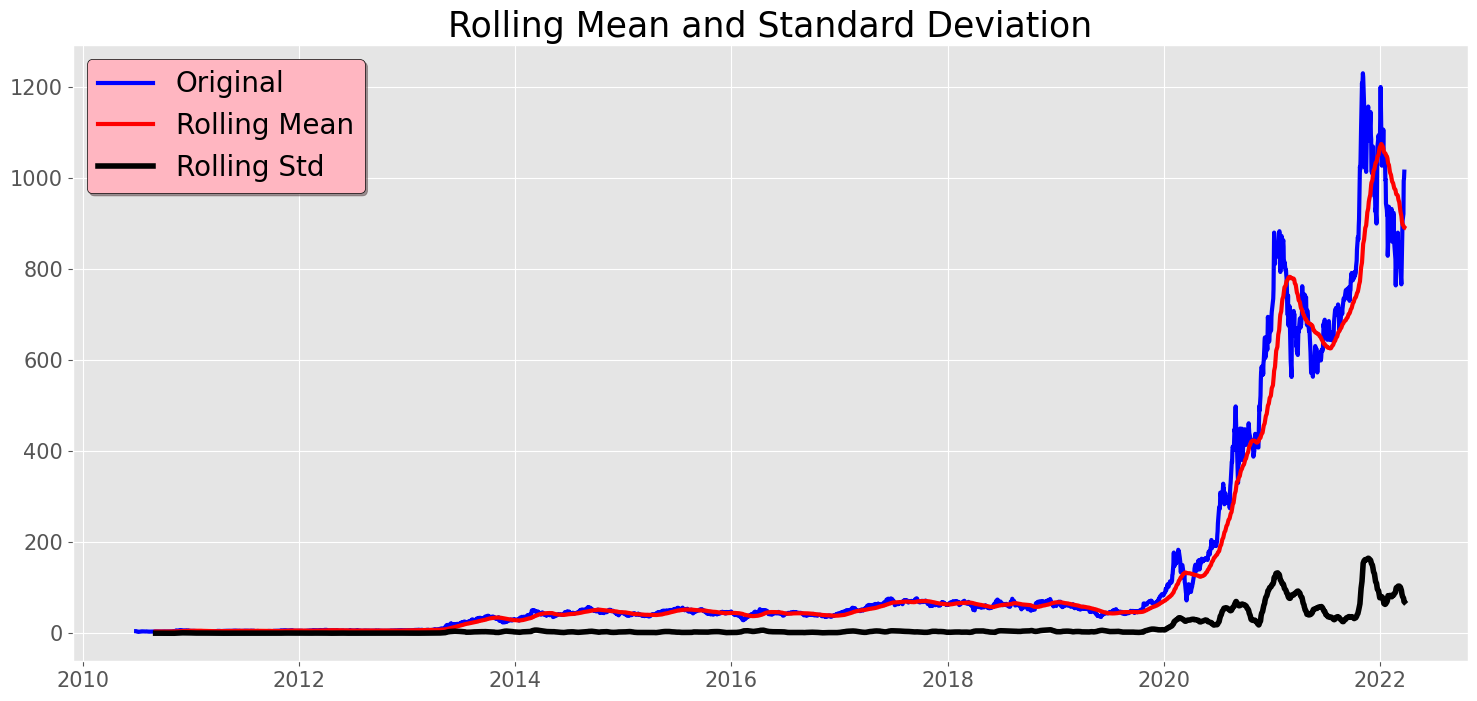

Results of dickey fuller test
Test Statistics            1.423942
p-value                    0.997220
No. of lags used          28.000000
Num                     2927.000000
critical value (1%)       -3.432586
critical value (5%)       -2.862528
critical value (10%)      -2.567296
dtype: float64


In [41]:
test_stationarity(stock_data.Close)

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

In [43]:
result.seasonal

Date
2010-06-29   -0.795449
2010-06-30    0.078115
2010-07-01    1.258012
2010-07-02    0.980713
2010-07-06    0.806705
                ...   
2022-03-18   -0.453949
2022-03-21   -0.795449
2022-03-22    0.078115
2022-03-23    1.258012
2022-03-24    0.980713
Name: seasonal, Length: 2956, dtype: float64

<Figure size 2000x1000 with 0 Axes>

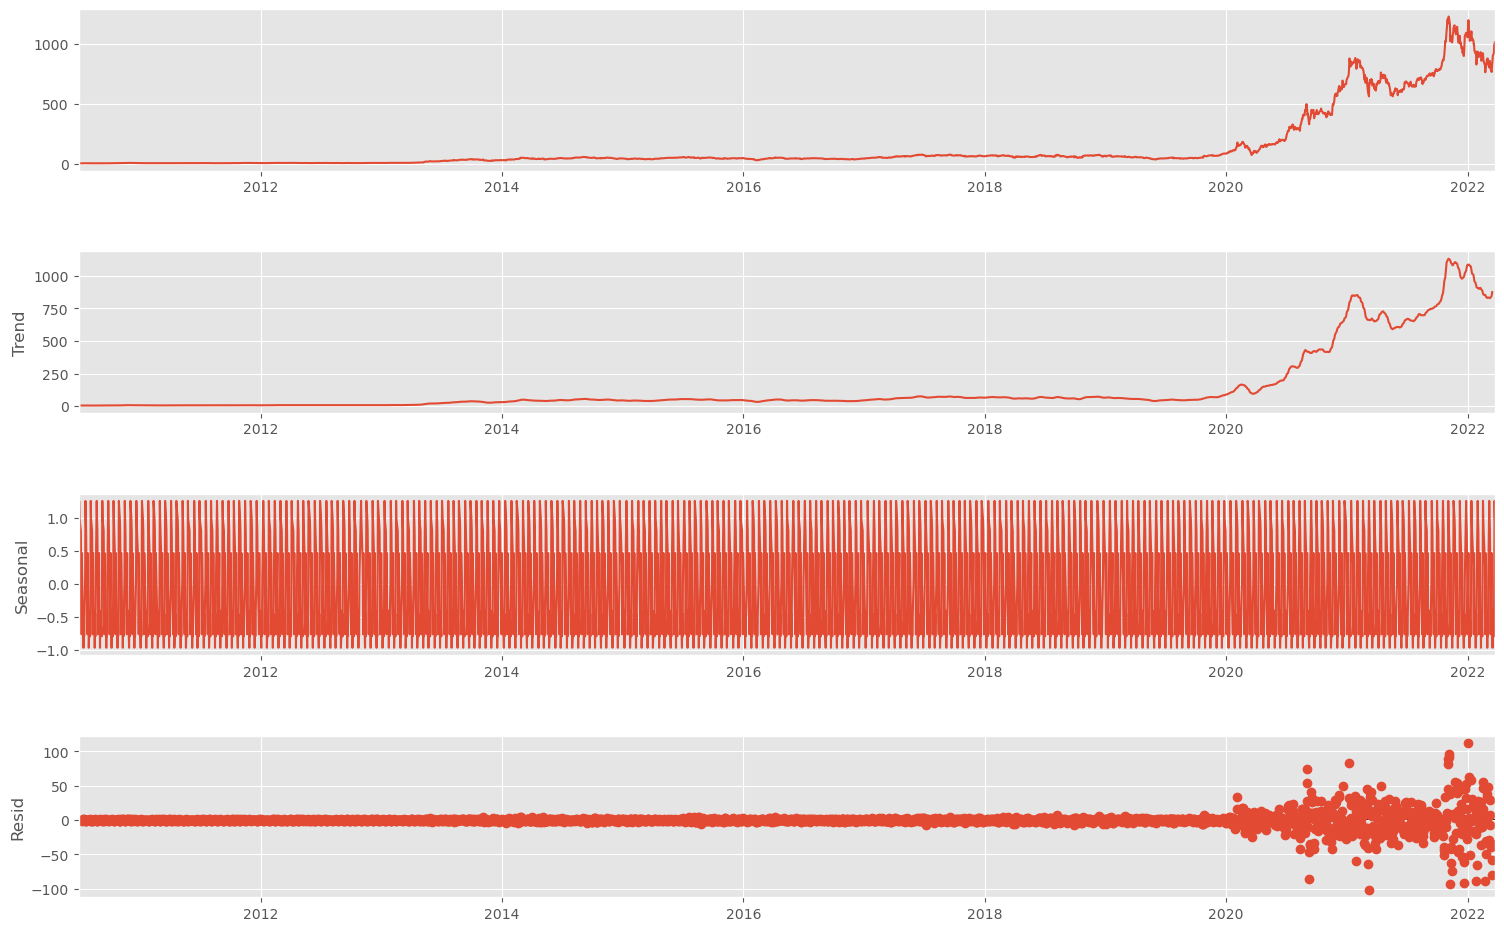

In [44]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12,model="multiplicative")

<Figure size 2000x1000 with 0 Axes>

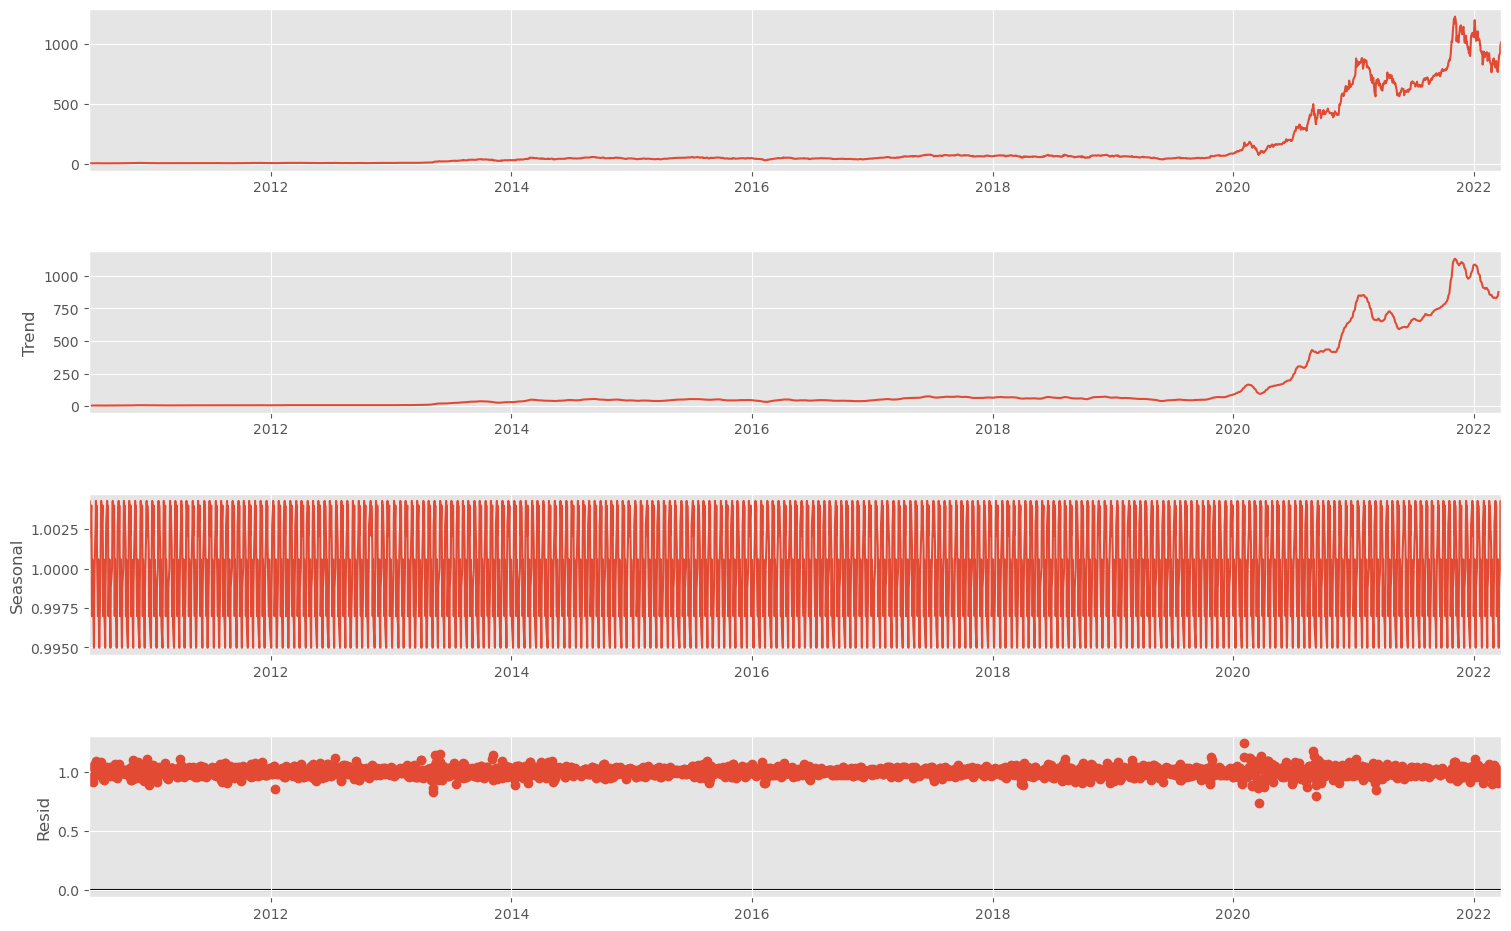

In [46]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<AxesSubplot:xlabel='Close'>

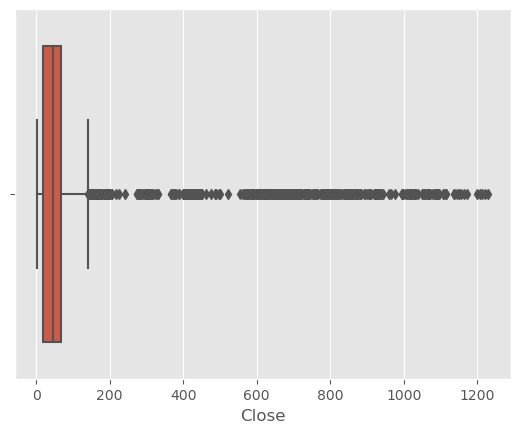

In [48]:
# Check Outliers:
import seaborn as sns
sns.boxplot(stock_data.Close)

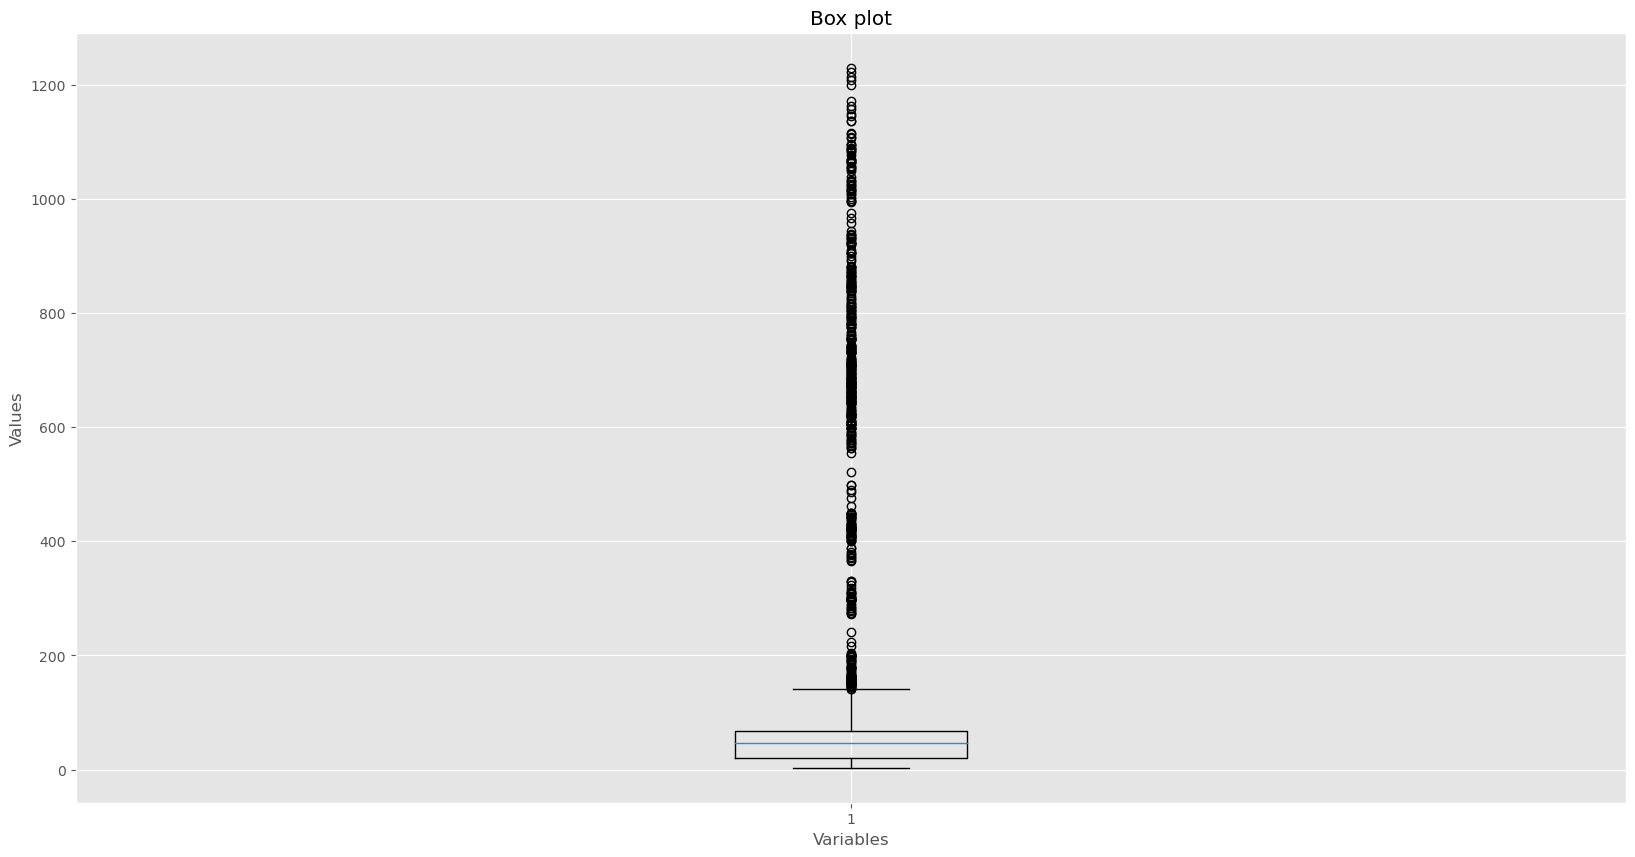

In [49]:
fig, ax=plt.subplots(figsize=(20,10))
# Plot the box plot
ax.boxplot(stock_data["Close"])
# Set the x-axis label
ax.set_xlabel('Variables')
# Set the y-axis label
ax.set_ylabel('Values')
# Set the title
ax.set_title('Box plot')
# Show the plot
plt.show()

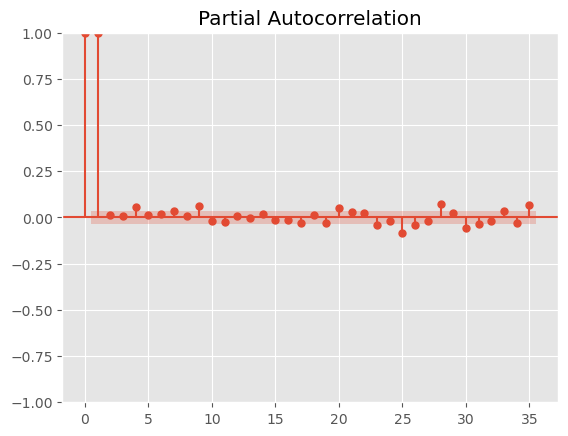

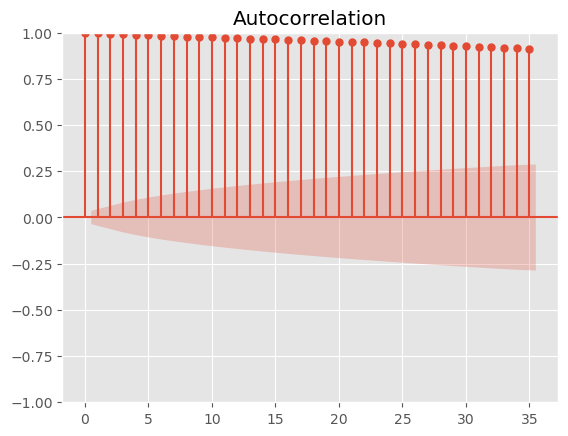

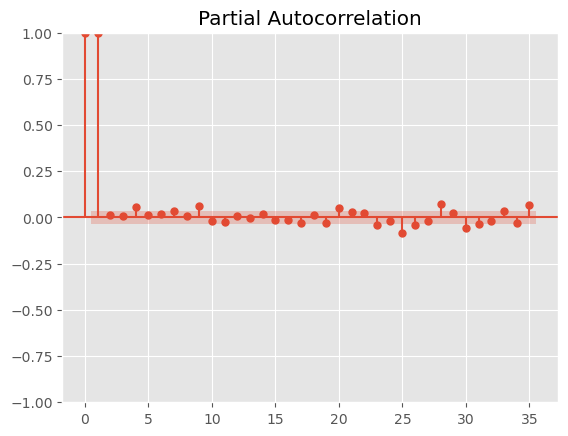

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

In [51]:
# Preprocessing data

In [52]:
df_close=stock_data["Close"]

In [53]:
df_close=df_close.diff()
df_close=df_close.dropna()

In [54]:
df_close

Date
2010-06-30    -0.012000
2010-07-01    -0.374000
2010-07-02    -0.552000
2010-07-06    -0.618000
2010-07-07    -0.062000
                ...    
2022-03-18    33.790039
2022-03-21    15.769958
2022-03-22    72.820007
2022-03-23     5.130005
2022-03-24    14.809998
Name: Close, Length: 2955, dtype: float64

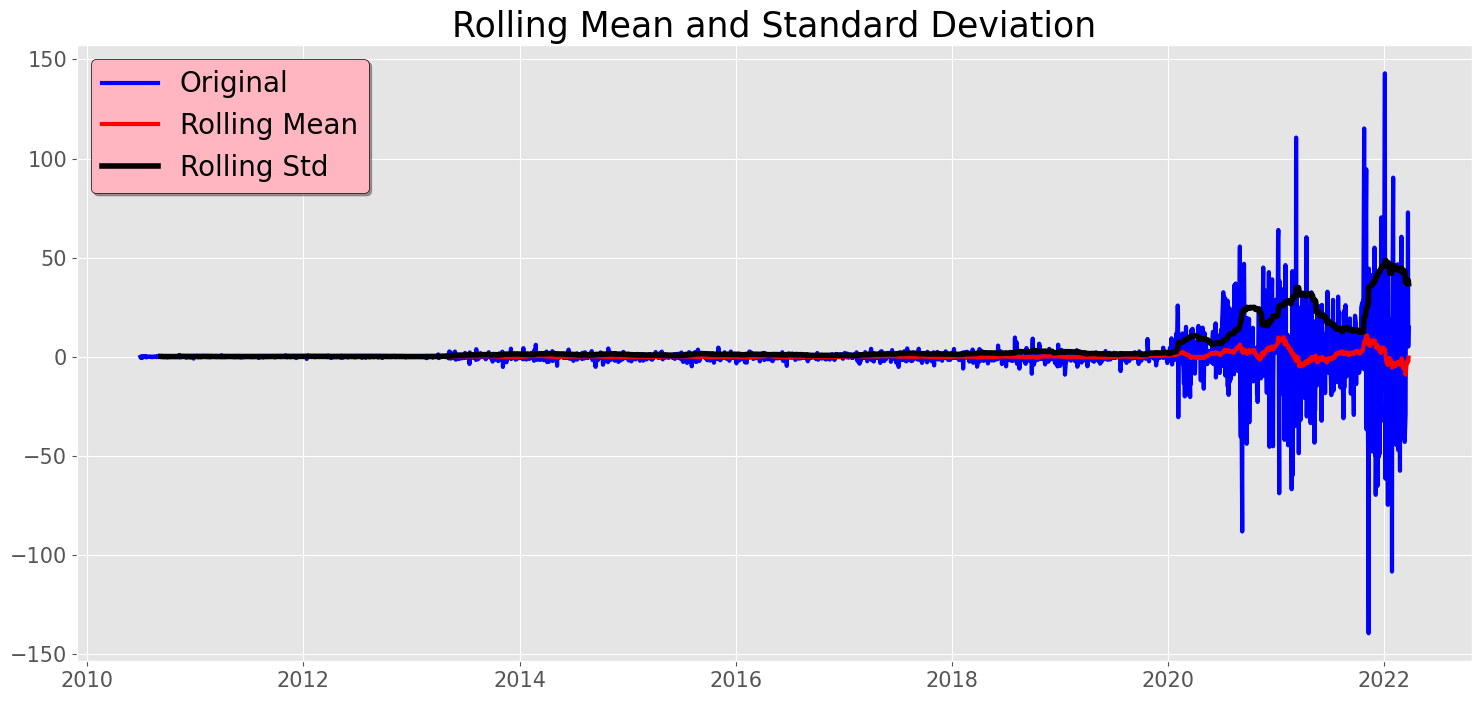

Results of dickey fuller test
Test Statistics        -9.844955e+00
p-value                 4.646088e-17
No. of lags used        2.800000e+01
Num                     2.926000e+03
critical value (1%)    -3.432587e+00
critical value (5%)    -2.862528e+00
critical value (10%)   -2.567296e+00
dtype: float64


In [55]:
test_stationarity(df_close)
# this is stationary time series, p value almost tends to zero.

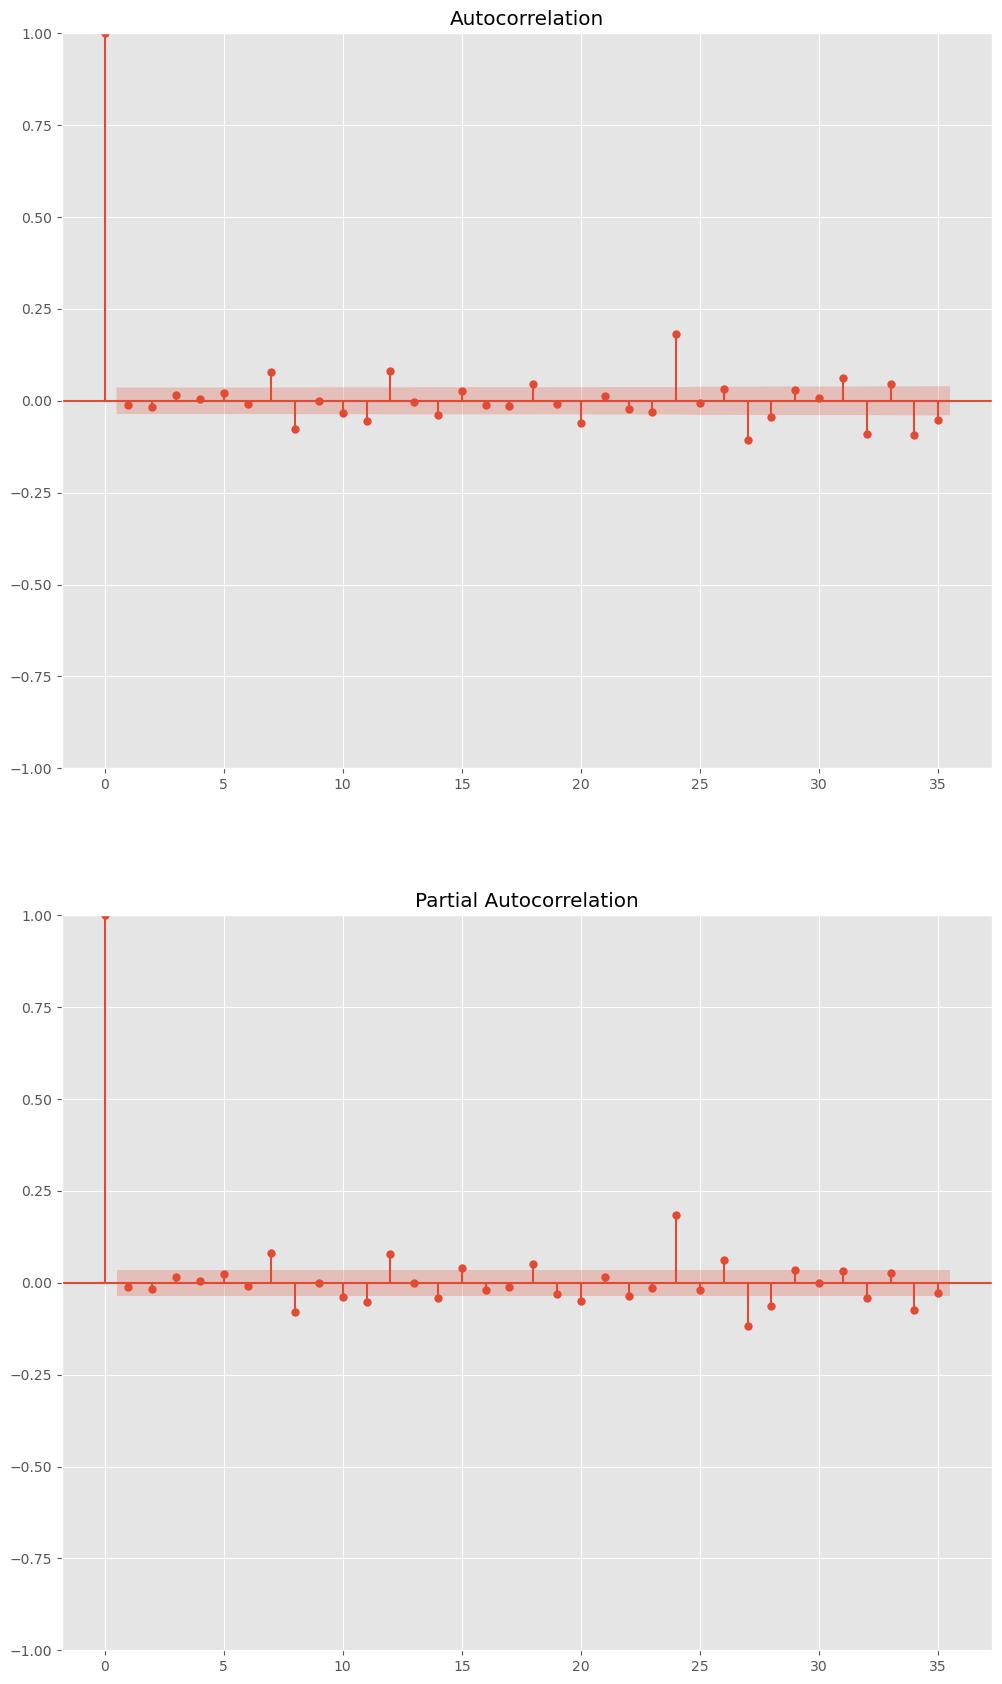

In [58]:
fig=plt.figure(figsize=(12,21))
ax1 = fig.add_subplot(211) # function
fig = plot_acf(df_close, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_close, ax=ax2)

In [59]:
df_close[:-440]

Date
2010-06-30   -0.012000
2010-07-01   -0.374000
2010-07-02   -0.552000
2010-07-06   -0.618000
2010-07-07   -0.062000
                ...   
2020-06-19   -0.612014
2020-06-22   -1.315995
2020-06-23    1.492005
2020-06-24   -8.186005
2020-06-25    5.026001
Name: Close, Length: 2515, dtype: float64

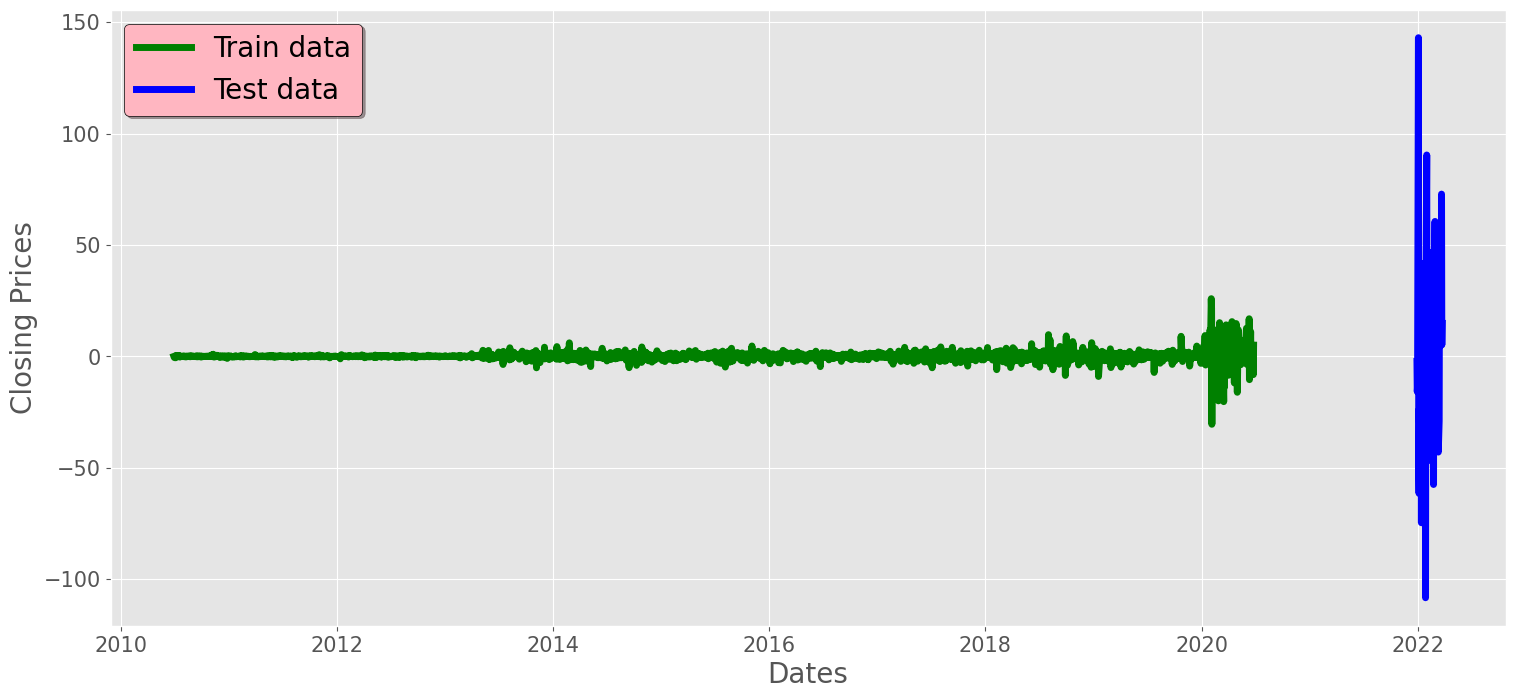

In [62]:
# Split data into train and test set
train_data=df_close[0:-440]
test_data=df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True, facecolor='lightpink', edgecolor = 'k')

# Time Series Model Building

In [63]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [64]:
history=[x for x in train_data]
history

[-0.011999999999999567,
 -0.37399999999999967,
 -0.5520000000000005,
 -0.6179999999999999,
 -0.06199999999999983,
 0.33199999999999985,
 -0.01200000000000001,
 -0.06999999999999984,
 0.21799999999999997,
 0.33999999999999986,
 0.010000000000000231,
 0.1499999999999999,
 0.25399999999999956,
 -0.32200000000000006,
 -0.016000000000000014,
 0.15600000000000058,
 0.05799999999999983,
 -0.06799999999999962,
 -0.08000000000000007,
 0.03399999999999981,
 -0.07399999999999984,
 -0.0820000000000003,
 0.19600000000000017,
 0.20599999999999952,
 -0.1379999999999999,
 -0.16199999999999992,
 -0.1719999999999997,
 0.0019999999999997797,
 -0.11399999999999988,
 -0.22599999999999998,
 -0.06000000000000005,
 0.14400000000000013,
 0.09199999999999964,
 0.07400000000000029,
 -0.07600000000000007,
 0.0040000000000000036,
 0.06199999999999983,
 0.20599999999999996,
 -0.18599999999999994,
 0.14000000000000012,
 -0.029999999999999805,
 -0.010000000000000231,
 0.03400000000000025,
 -0.07800000000000029,
 0.19

In [67]:
model=ARIMA(history,order=(1,1,1))
# it's order of p,d,q.

In [68]:
model

In [69]:
model=model.fit()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2515
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5541.182
Date:                Sat, 03 Jun 2023   AIC                          11088.364
Time:                        12:30:33   BIC                          11105.853
Sample:                             0   HQIC                         11094.711
                               - 2515                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0025      0.005      0.469      0.639      -0.008       0.013
ma.L1         -0.9961      0.001  -1143.586      0.000      -0.998      -0.994
sigma2         4.7992      0.028    170.242      0.000       4.744       4.854
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            223228.18
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              64.78   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
model.forecast()

array([0.43033209])

In [72]:
test_data[0]

-2.280029999999897

In [73]:
mean_squared_error([test_data[0]],model.forecast())

7.346062681578795

In [74]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

2.7103620941820292

In [75]:
# Earlier we define p,d,q value, now we r giving some range:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

In [76]:
for i in p_values:
    for j in d_values:
        for k in q_values:
            print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [77]:
def train_arima_model(X, y, arima_order):
    # Prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # Calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [79]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                        continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [80]:
# Evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=41.112
ARIMA(0, 0, 1) RMSE=41.662
ARIMA(0, 0, 2) RMSE=42.142
ARIMA(0, 1, 0) RMSE=58.841
ARIMA(0, 1, 1) RMSE=41.148
ARIMA(0, 1, 2) RMSE=42.400
ARIMA(0, 2, 0) RMSE=100.271
ARIMA(0, 2, 1) RMSE=58.854


C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2) RMSE=42.573
ARIMA(1, 0, 0) RMSE=41.531
ARIMA(1, 0, 1) RMSE=41.356
ARIMA(1, 0, 2) RMSE=42.629
ARIMA(1, 1, 0) RMSE=56.233
ARIMA(1, 1, 1) RMSE=42.110
ARIMA(1, 1, 2) RMSE=42.682
ARIMA(1, 2, 0) RMSE=81.617
ARIMA(1, 2, 1) RMSE=56.248


C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(1, 2, 2) RMSE=42.325
ARIMA(2, 0, 0) RMSE=42.265
ARIMA(2, 0, 1) RMSE=42.838


C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2) RMSE=43.812
ARIMA(2, 1, 0) RMSE=53.603
ARIMA(2, 1, 1) RMSE=42.950
ARIMA(2, 1, 2) RMSE=42.598
ARIMA(2, 2, 0) RMSE=75.081
ARIMA(2, 2, 1) RMSE=53.613


C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\rajee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2) RMSE=48.177
Best ARIMA(0, 0, 0) RMSE=41.112


In [102]:
history=[x for x in train_data]
predictions=list()
for i in range(len(test_data)):
    model = ARIMA(history, order=(0,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha=0.05)
    predictions.append(fc)
    history.append(test_data[i])
    # Calculate out of sample error
print(f"RMSE is {np.sqrt(mean_squared_error(test_data, predictions))}") 

RMSE is 41.111531873562896


In [103]:
test_data

Date
2021-12-29     -2.280030
2021-12-30    -15.849975
2021-12-31    -13.559937
2022-01-03    143.000000
2022-01-04    -50.190063
2022-01-05    -61.469971
2022-01-06    -23.420044
2022-01-07    -37.739990
2022-01-10     31.160034
2022-01-11      6.280029
2022-01-12     41.819947
2022-01-13    -74.659912
2022-01-14     18.049926
2022-01-18    -19.099975
2022-01-19    -34.859986
2022-01-20      0.619996
2022-01-21    -52.369996
2022-01-24    -13.900024
2022-01-25    -11.599976
2022-01-26     19.009949
2022-01-27   -108.309997
2022-01-28     17.250000
2022-01-31     90.369995
2022-02-01     -5.469971
2022-02-02    -25.590027
2022-02-03    -14.519958
2022-02-04     32.179992
2022-02-07    -15.979980
2022-02-08     14.659973
2022-02-09     10.000000
2022-02-10    -27.450012
2022-02-11    -44.549988
2022-02-14     15.760010
2022-02-15     46.669983
2022-02-16      0.960022
2022-02-17    -47.040039
2022-02-18    -19.369996
2022-02-22    -35.449951
2022-02-23    -57.490051
2022-02-24     36.73

In [104]:
predictions

[array([0.07650331]),
 array([0.0755665]),
 array([0.06923934]),
 array([0.06382663]),
 array([0.12056967]),
 array([0.10060529]),
 array([0.07618222]),
 array([0.06686583]),
 array([0.05188077]),
 array([0.06420578]),
 array([0.06666746]),
 array([0.08319696]),
 array([0.05361912]),
 array([0.06073842]),
 array([0.05316262]),
 array([0.03936189]),
 array([0.03959124]),
 array([0.01889227]),
 array([0.01339731]),
 array([0.00881428]),
 array([0.01630972]),
 array([-0.02640555]),
 array([-0.01959601]),
 array([0.01601923]),
 array([0.01385701]),
 array([0.00377791]),
 array([-0.00193779]),
 array([0.01072189]),
 array([0.0044335]),
 array([0.01019382]),
 array([0.0141181]),
 array([0.00333268]),
 array([-0.01415908]),
 array([-0.0079683]),
 array([0.01034335]),
 array([0.01071586]),
 array([-0.0077291]),
 array([-0.01531622]),
 array([-0.02919534]),
 array([-0.0516933]),
 array([-0.03729772]),
 array([-0.03372283]),
 array([-0.01002047]),
 array([-0.01239491]),
 array([-0.00632217]),
 a

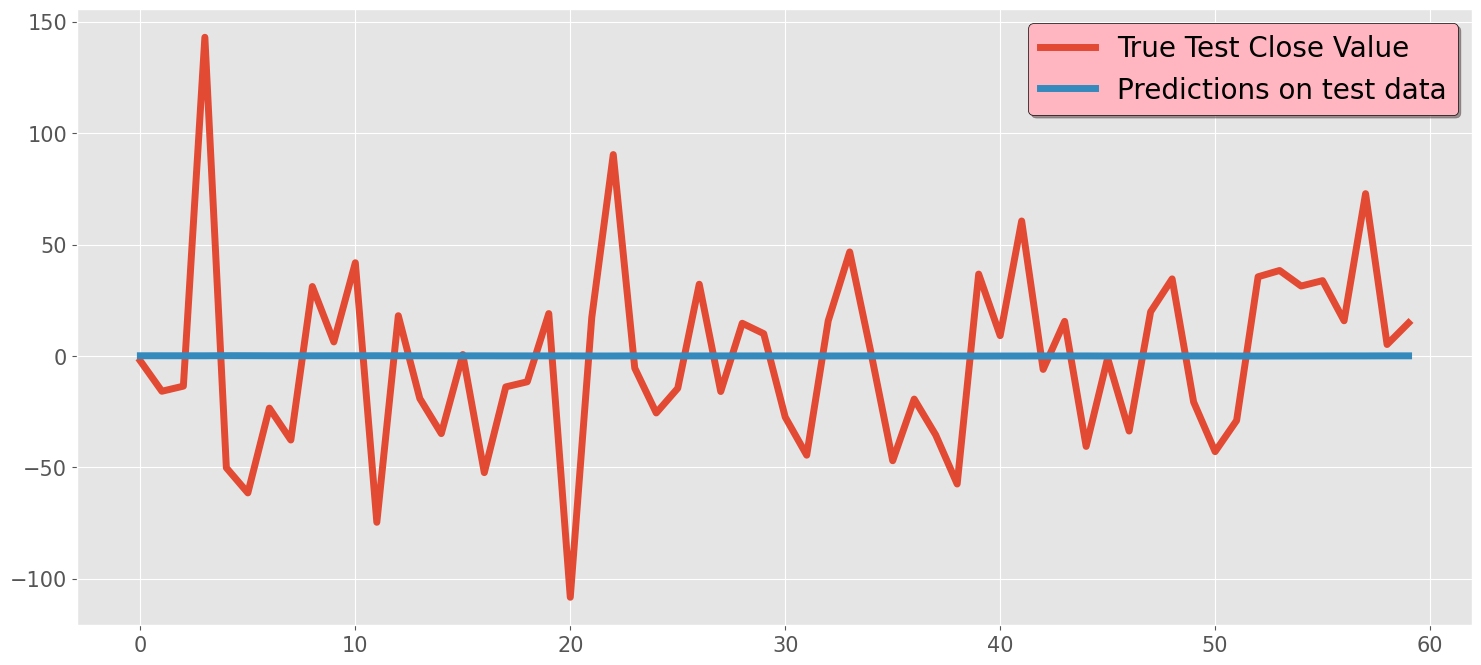

In [105]:
plt.figure(figsize=(18,8))
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)),predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True, facecolor='lightpink', edgecolor = 'k')
plt.show()

In [106]:
fc_series = pd.Series(predictions, index=test_data.index)
fc_series

Date
2021-12-29       [0.07650330537075874]
2021-12-30       [0.07556649981293546]
2021-12-31       [0.06923933631279809]
2022-01-03        [0.0638266275128354]
2022-01-04       [0.12056966599255134]
2022-01-05        [0.1006052899185973]
2022-01-06       [0.07618222144209631]
2022-01-07       [0.06686583199254632]
2022-01-10       [0.05188077008171458]
2022-01-11       [0.06420578075393293]
2022-01-12       [0.06666746236913701]
2022-01-13       [0.08319696426683061]
2022-01-14       [0.05361911823944089]
2022-01-18       [0.06073841957424537]
2022-01-19      [0.053162622116143865]
2022-01-20      [0.039361890698580954]
2022-01-21      [0.039591237453532706]
2022-01-24       [0.01889226618352049]
2022-01-25      [0.013397305065823576]
2022-01-26      [0.008814282782706595]
2022-01-27         [0.016309717860313]
2022-01-28     [-0.026405545020320338]
2022-01-31     [-0.019596014133145163]
2022-02-01      [0.016019225141135737]
2022-02-02      [0.013857008728767035]
2022-02-03      [0.0

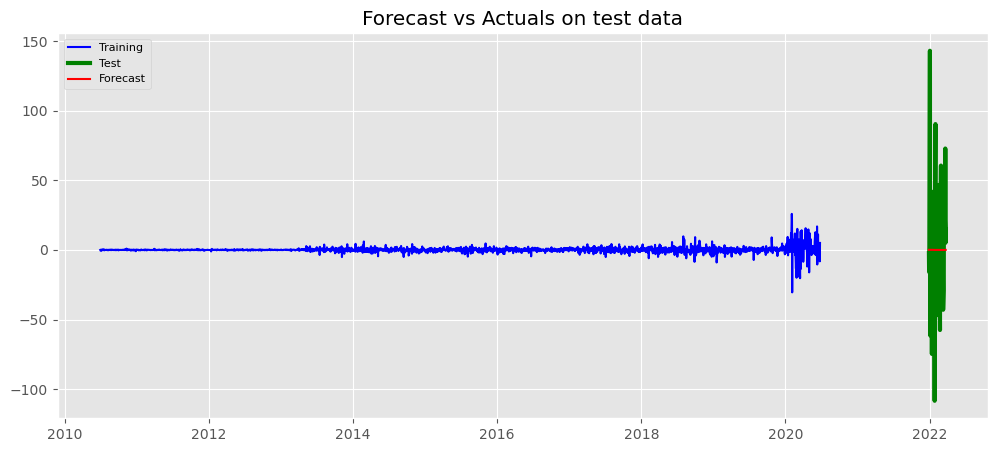

In [107]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

AttributeError: 'ARIMA' object has no attribute 'get_prediction'

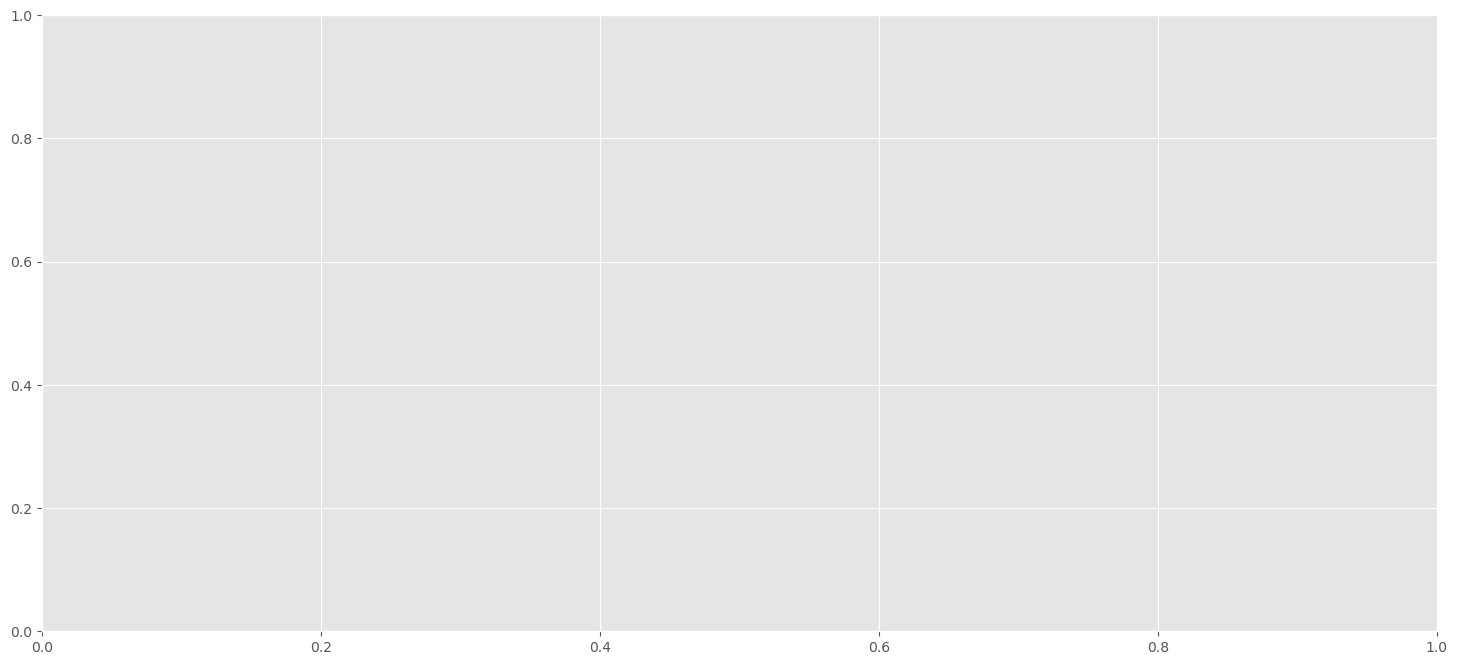

In [110]:
from statsmodels.graphics.tsaplots import plot_predict
fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(111)
plot_predict(result=model,start=1,end=len(df_close)+60,ax=ax1)
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightpink',edgecolor='k')
plt.show()

In [89]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

AttributeError: 'function' object has no attribute 'forecast'

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)),predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True, facecolor='lightpink', edgecolor = 'k')
plt.show()